In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('file:///Users/mengyuanchen/Desktop/19FALL/IE%20598/HW/HW5/hw5_treasury yield curve data.csv')
df=df.dropna()
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [157]:
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [142]:
df.shape

(8071, 32)

In [162]:
df=df.drop(['Date'], axis=1)

In [163]:
from sklearn.model_selection import train_test_split
#Split data
X=df.values[:,0:30]
y=df.values[:,30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

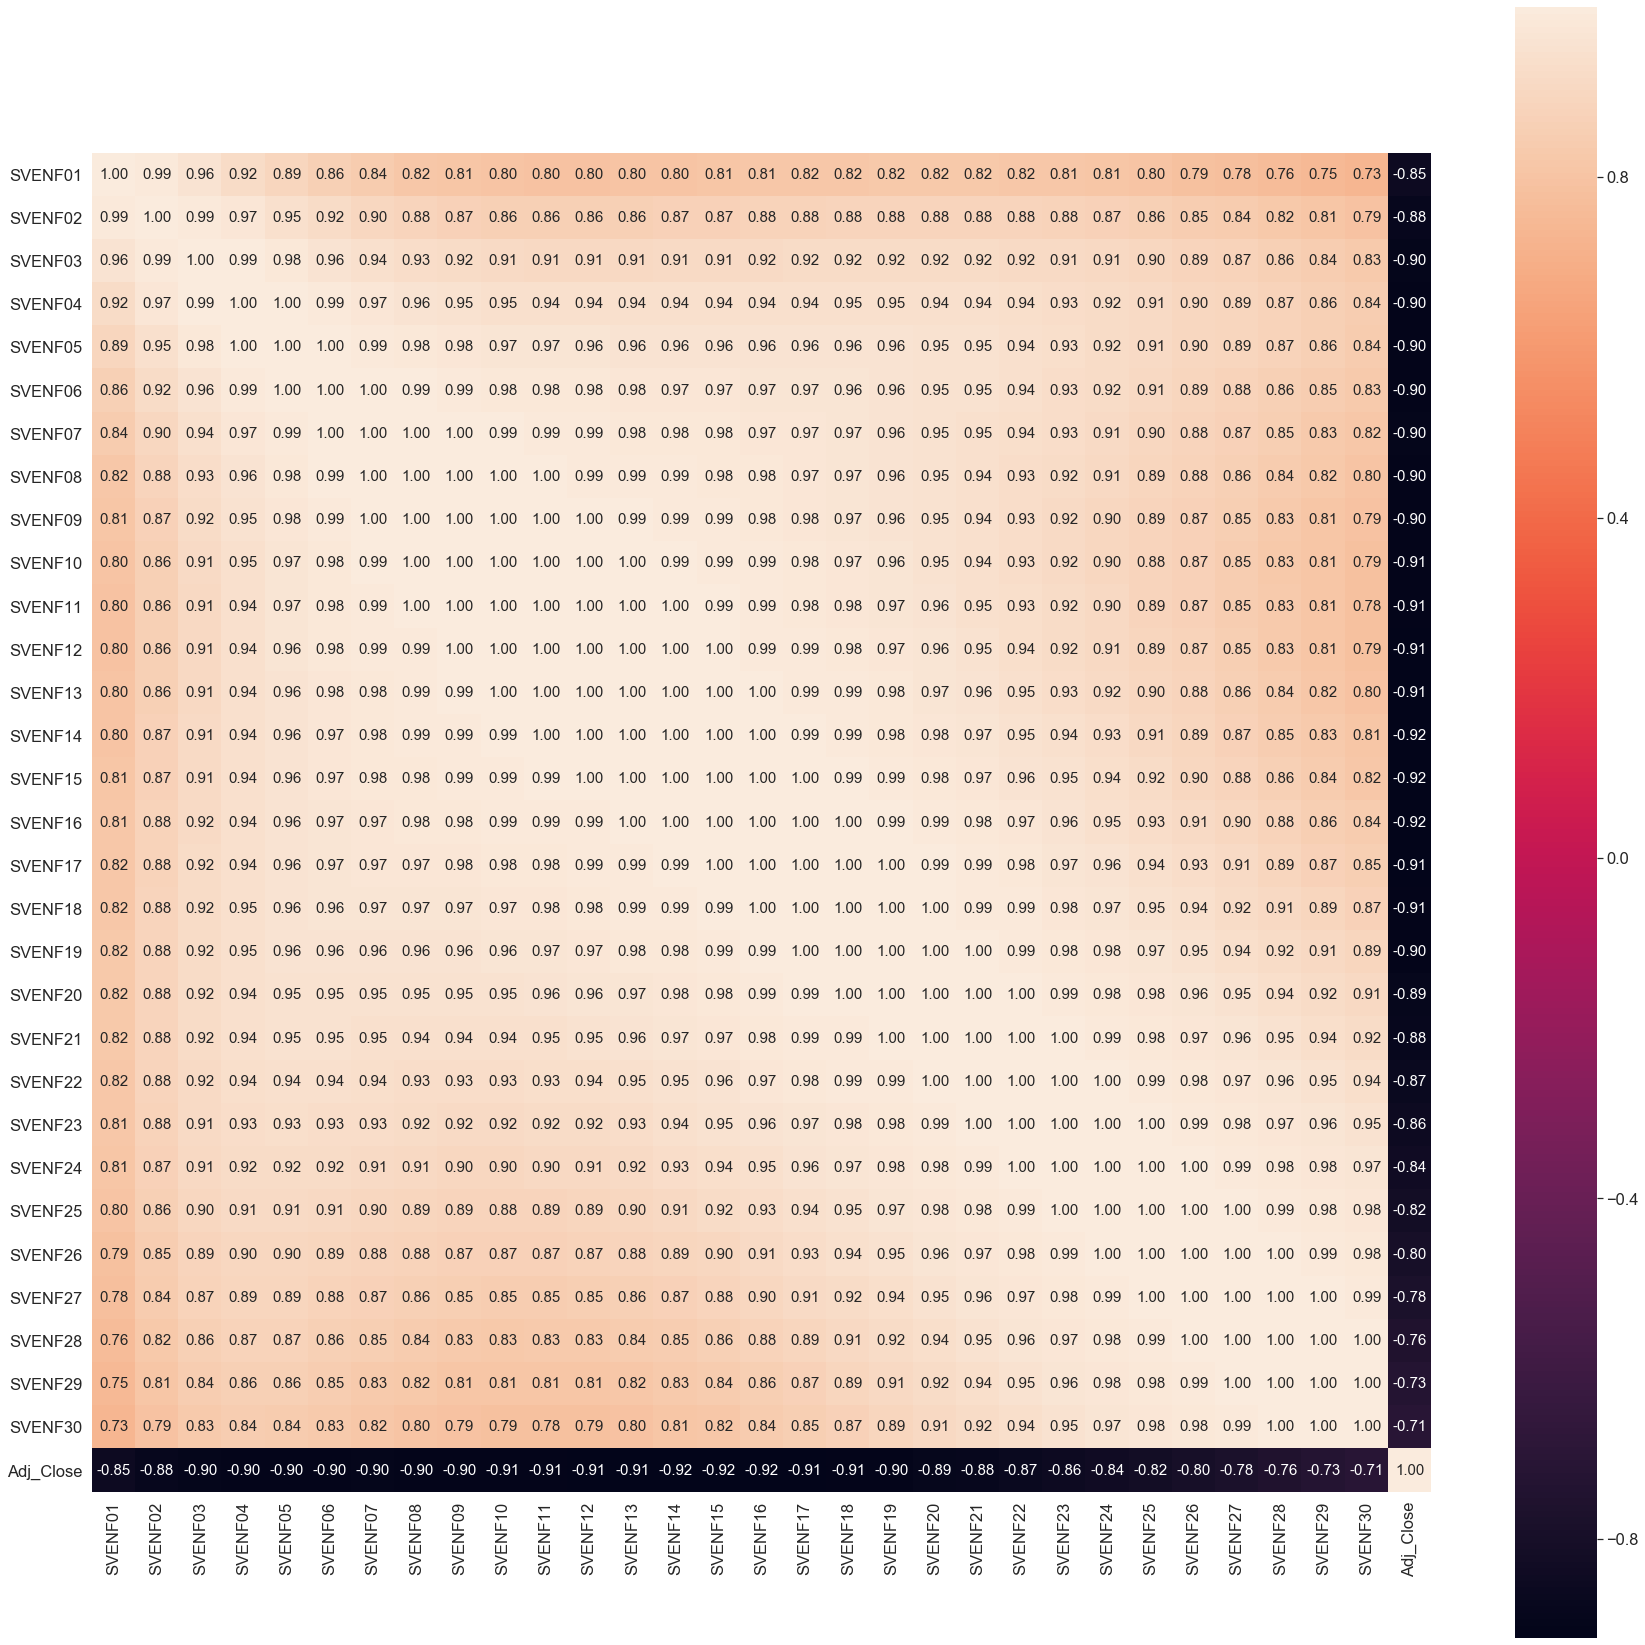

In [170]:
# Exploratory Data Analysis
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=df.columns, xticklabels=df.columns)
plt.gcf().set_size_inches(30, 30)
plt.show()

In [165]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [166]:
print(pca.components_)

[[ 0.22272811  0.22351813  0.21696277  0.209487    0.20270205  0.19698448
   0.19234337  0.18866475  0.1857945   0.18357174  0.18184582  0.18048311
   0.17937041  0.1784152   0.17754404  0.17670055  0.17584312  0.1749425
   0.17397916  0.17294199  0.17182586  0.17063041  0.16935868  0.16801665
   0.16661143  0.16515166  0.16364622  0.16210416  0.16053478  0.15894656]
 [ 0.24313945  0.18262012  0.14154066  0.12457588  0.12401946  0.13157051
   0.14107567  0.14863987  0.15210647  0.15051492  0.143666    0.13181283
   0.11545518  0.0952033   0.07169827  0.04556065  0.01736563 -0.01237003
  -0.04319259 -0.07470931 -0.106587   -0.13854219 -0.17034081 -0.20178845
  -0.23272769 -0.26303059 -0.29259603 -0.32134607 -0.34922019 -0.37617557]
 [-0.60084874 -0.4366162  -0.28286353 -0.15279715 -0.04750789  0.03447188
   0.09571605  0.13920459  0.16791025  0.18457695  0.19162456  0.19112471
   0.18481501  0.17413051  0.16024074  0.14408931  0.1264301   0.10785927
   0.08884382  0.06974491  0.05083925

In [167]:
print(pca.explained_variance_)

[107.90283548   4.39995625   3.63898432]


In [168]:
print(pca.explained_variance_ratio_)

[0.92502725 0.03771986 0.03119621]


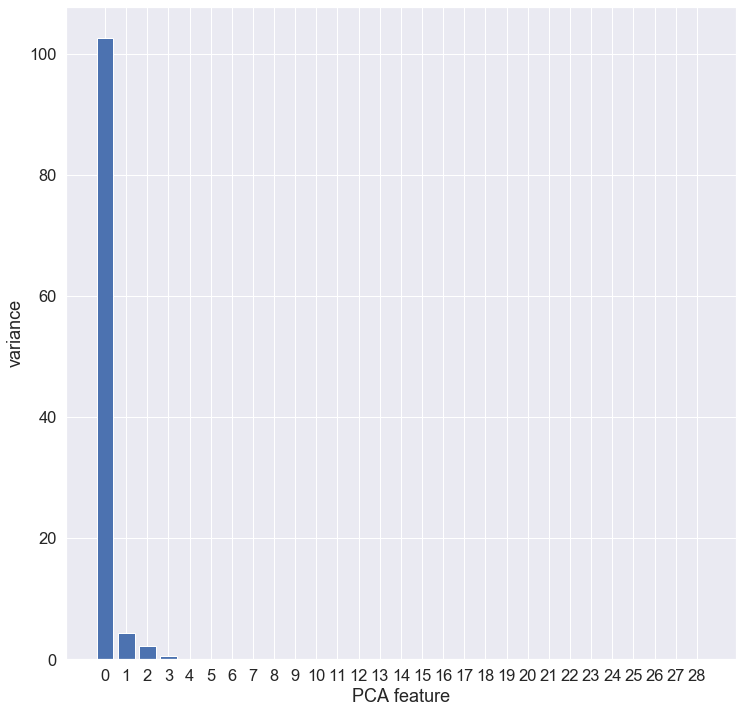

In [182]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
# data=
pca.fit_transform(X)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.gcf().set_size_inches(12, 12)
plt.show()

In [172]:
pca = PCA(n_components=3)
pca.fit(X)
transformed = pca.transform(X)
print(transformed.shape)

(8071, 3)


In [173]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [174]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.79579848e+01 1.22313057e+00 6.55411544e-01 1.45561136e-01
 1.99031388e-02 2.06243818e-03 2.84492074e-04 3.29679042e-05
 2.55310505e-06 2.02358034e-07 1.41807229e-08 1.14065185e-09
 1.87834481e-10 2.79223231e-10 1.97434721e-10 2.08170687e-10
 2.16456169e-10 2.61581763e-10 2.21833017e-10 2.26976024e-10
 2.24866645e-10 2.31123891e-10 2.57846191e-10 2.56092787e-10
 2.35379959e-10 2.52582535e-10 2.49758480e-10 2.38344221e-10
 2.43769611e-10 2.44978383e-10]


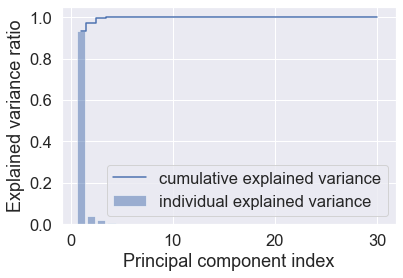

In [175]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,31), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [176]:
print(cum_var_exp)

[0.93179697 0.97256205 0.99440592 0.99925725 0.99992059 0.99998933
 0.99999881 0.99999991 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


[0.93067768 0.0418521  0.02150743]


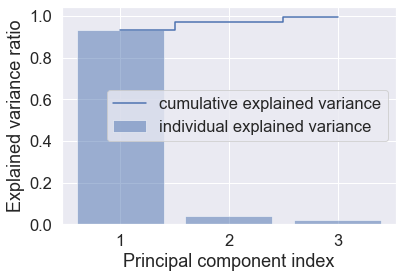

[0.93067768 0.97252978 0.99403721]


In [177]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
print(pca.explained_variance_ratio_)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,4), pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,4), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()
print(cum_var_exp)

In [178]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


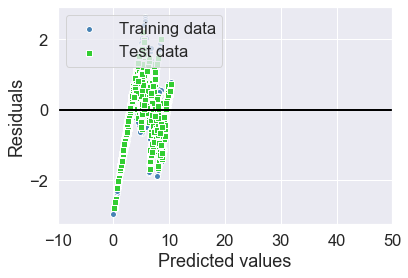

Slope: -4.838
Intercept: 11.807
R^2 train: 0.902, test: 0.904
MSE train: 0.603, test: 0.612


In [183]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X = df.iloc[:, 0:-1].values
y = df['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train,c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
# R^2
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
#MSE
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

In [180]:
print("My name is {Mengyuan Chen}")
print("My NetID is: {mchen100}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Mengyuan Chen}
My NetID is: {mchen100}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
